**Plot multiple volcanic data sets from the FITS (FIeld Time Series) database**

In this notebook we will plot data of multiple types from volcano observatory instruments using data from the FITS (FIeld Time Series) database. This notebook assumes that the reader has either read the previous FITS data access and plotting Jupyter Notebook or has a basic understanding of Python. Some of the code from the previous notebook has been brought over in the form of package imports and a function in the first code segment.

To begin, run the following code segment:

In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define functions

def build_query(site, data_type):
    
    '''
    Take site code and data type and generate a FITS API query for an observations csv file
    '''
    
    # Ensure parameters are in the correct format for use with the FITS API

    site = str.upper(site) # ensure site code is upper case
    
    # Build a FITS API query by combining parameter:value pairs in the query format

    query_suffix = 'siteID=%s&typeID=%s' % (site, data_type)

    # Combine the query parameter=value string with the FITS observation data URL

    URL = 'https://fits.geonet.org.nz/observation?' + query_suffix

    return URL

Next we specify the sites and corresponding data types we want to view. Volcanic data has many types, and FITS database TypeID may not be obvious, so [this](https://fits.geonet.org.nz/type) may be a useful resource if the query isn't working.

To discover what geodetic sites exist, browse the GeoNet [Network Maps](http://www.geonet.org.nz/data/network/sensor/map). Volcanic sites can be found by data type in the [FITS GUI](https://fits.geonet.org.nz/).

At the Ruapehu Crater Lake (RU001) lake temperature and Mg<sup>2+</sup> concentration are used (in combination with the lake level and wind speed) to model the amount of energy that enters the lake from below. In the next code segment we will gather this data.

In [2]:
# Set sites and respective data types in lists.

sites = ['RU001', 'RU001']
data_types = ['t', 'Mg-w']

# Ensure input is in list format

if type(sites) != list:
    
    site = sites
    sites = []
    sites.append(site)
    
if type(data_types) != list:
    
    temp_data_types = data_types
    data_types = []
    data_types.append(temp_data_types)

# Check that each site has a corresponding data type and vice versa

if len(sites) != len(data_types):
    
    print('Number of sites and data types are not equal!')

# Create a list to store DataFrame objects in

data = [[] for i in range(len(sites))]

# Parse csv data from the FITS database into the data list 

for i in range(len(sites)):
    
    URL = build_query(sites[i], data_types[i]) # FITS API query building function
    
    try:
        
        data[i] = pd.read_csv(URL, names=['date-time', data_types[i], 'error'], header=0, parse_dates = [0], index_col = 0)
    
    except:
        
        print('Site or data type does not exist')

The only difference between this code segment and the corresponding segment of the previous notebook is that here we store DataFrame objects in a list and generate them using a for loop. Again we can plot the data in a simple plot:

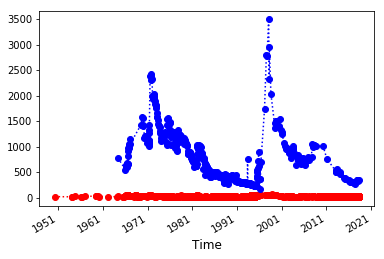

In [3]:
# Plot the data on one figure

colors = ['red', 'blue']
for i in range(len(data)):
    
    data[i].loc[:, data_types[i]].plot(marker='o', linestyle=':', color = colors[i])
       
plt.xlabel('Time', fontsize = 12)
plt.ylabel('')
plt.show()

While the above plot may succeed in showing the two data series on the same figure, it doesn't do it in a very useful way. We can use a few features of matplotlib to improve the readability of the figure: 

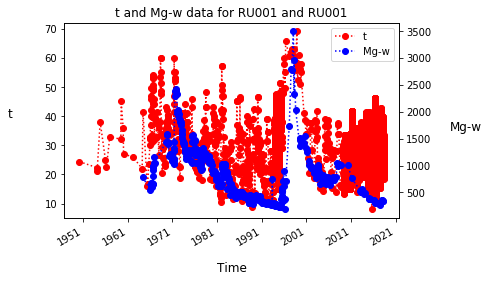

In [4]:
# Generate blank figure to plot onto

fig, ax1 = plt.subplots()

# Plot the first data series onto the figure

data[0].loc[:, data_types[0]].plot(marker='o', linestyle=':', ax = ax1, color = colors[0], label = data_types[0])

# Plot the second data series onto the figure

ax2 = ax1.twinx() # Share x axis between two y axes
data[1].loc[:, data_types[1]].plot(marker='o', linestyle=':', ax = ax2, color = colors[1], label = data_types[1])

# Make a legend for both plots

plot1, labels1 = ax1.get_legend_handles_labels()
plot2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(plot1 + plot2, labels1 + labels2, loc = 0)

# Tidy up plot

ax1.set_xlabel('Time', rotation = 0, labelpad = 15, fontsize = 12)
ax1.set_ylabel(data_types[0], rotation = 0, labelpad = 35, fontsize = 12)
ax2.set_ylabel(data_types[1], rotation = 0, labelpad = 35, fontsize = 12)
plt.title(data_types[0] + ' and ' + data_types[1] + ' data for ' + sites[0] + ' and ' + sites[1], fontsize = 12)

plt.show()

This figure is much easier to compare the data series in, but it is also very cluttered. The next code segment plots each data series in separate subplots within the same figure to maximise readability without reducing the operator's ability to compare the two data series.

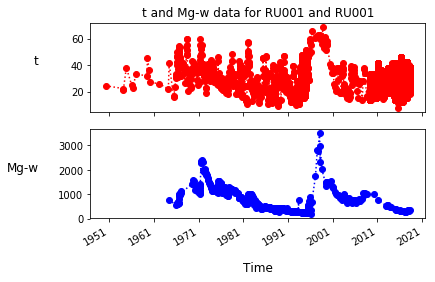

In [5]:
# New figure

plt.figure()

# Plot first data series onto subplot

ax1 = plt.subplot(211) # Generate first subplot
data[0].loc[:, data_types[0]].plot(marker='o', linestyle=':', ax = ax1, color = colors[0], label = data_types[0])
plt.title(data_types[0] + ' and ' + data_types[1] + ' data for ' + sites[0] + ' and ' + sites[1], fontsize = 12)

# Plot second data series onto second subplot

ax2 = plt.subplot(212, sharex = ax1)
data[1].loc[:, data_types[1]].plot(marker='o', linestyle=':', color = colors[1], label = data_types[1])

# Tidy up plot

ax2.set_xlabel('Time', rotation = 0, labelpad = 15, fontsize = 12)
ax1.set_ylabel(data_types[0], rotation = 0, labelpad = 35, fontsize = 12)
ax2.set_ylabel(data_types[1], rotation = 0, labelpad = 35, fontsize = 12)

# Remove messy minor x ticks

ax1.tick_params(axis = 'x', which = 'minor', size = 0)
ax2.tick_params(axis = 'x', which = 'minor', size = 0)

plt.show()


Which of these two plot styles is best is data-dependent and a matter of preference. When only two data series are being plotted it is fairly easy to overlay the two, but when more than two are used subplotting quickly becomes favourable.

Another useful dataset used for volcanic activity observation is the CO<sub>2</sub>/SO<sub>2</sub> ratio, as high values of this ratio can indicate a fresh batch of magma beneath a volcano. We will look now at the dataset for monthly airborne measurements of the two gases at White Island. As multiple collection methods exist for these data types, we will need to expand the build_query function to allow methodID specification.

In [6]:
# Define functions

def build_query(site, data_type, method_type):
    
    '''
    Take site code and data type and generate a FITS API query for an observations csv file
    '''
    
    # Ensure parameters are in the correct format for use with the FITS API

    site = str.upper(site) # ensure site code is upper case
    
    # Build a FITS API query by combining parameter:value pairs in the query format

    query_suffix = 'siteID=%s&typeID=%s&methodID=%s' % (site, data_type, method_type)

    # Combine the query parameter=value string with the FITS observation data URL

    URL = 'https://fits.geonet.org.nz/observation?' + query_suffix

    return URL

Now we will gather the data, do a few specific modifications, and then present it. If you want to change the data types used here the code will fail. This is because there are hard-coded variable redefinitions that require this particular type of data. Consider this code segment an example, and not a modifiable script like the other segments of this notebook.

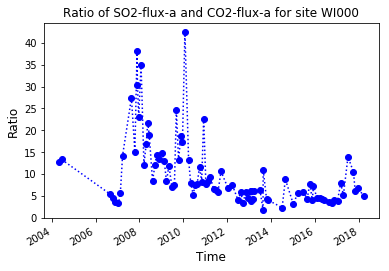

In [7]:
# Redefine variables

sites = ['WI000','WI000']
data_types = ['SO2-flux-a', 'CO2-flux-a']
method_types = ['cont', 'cont']

# Check that each site has a corresponding data type and vice versa

if (len(sites) != len(data_types)) or (len(sites) != len(method_types)) or (len(data_types) != len(method_types)):
    
    print('Number of sites, data types, and collection methods are not all equal!')

# Create a list to store DataFrame objects in

data = [[] for i in range(len(sites))]

# Parse csv data from the FITS database into the data list 

for i in range(len(sites)):
    
    URL = build_query(sites[i], data_types[i], method_types[i]) # FITS API query building function
    
    try:
        
        data[i] = pd.read_csv(URL, names=['date-time', data_types[i], 'error'], header=0, parse_dates = [0], index_col = 0)
    
    except:
        
        print('Site or data type does not exist')

# Remove non-synchronous measurements in the two data series

data[0] = data[0][data[0].index.isin(data[1].index)]
data[1] = data[1][data[1].index.isin(data[0].index)]

# Hard-code in the ratio calculation

ratio = pd.DataFrame() # make an empty DataFrame
ratio['value'] = data[1]['CO2-flux-a'] / data[0]['SO2-flux-a'] # calculate the ratio between observations and call it value
ratio.index = data[1].index # the ratio index is the CO2 flux index (observation times)

# Plot the dataset

ratio.loc[:,'value'].plot(marker='o', linestyle=':', color='blue')

# Add functional aspects to plot

plt.xlabel('Time', fontsize = 12)
plt.ylabel('Ratio', fontsize = 12)
plt.title('Ratio of ' + data_types[0] + ' and ' + data_types[1] + ' for site ' + sites[0], fontsize = 12)
plt.show()